In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

## Number of Ranked Universities per Country

In [2]:
# Extract CSV into DataFrame
count_file = "results/chart_data.csv"
count_file = pd.read_csv(count_file, encoding='UTF-8')
count_file.head()

,country,Number of Ranked Universities
0,United States,157
1,United Kingdom,76
2,Germany,45
3,Japan,44
4,China,40


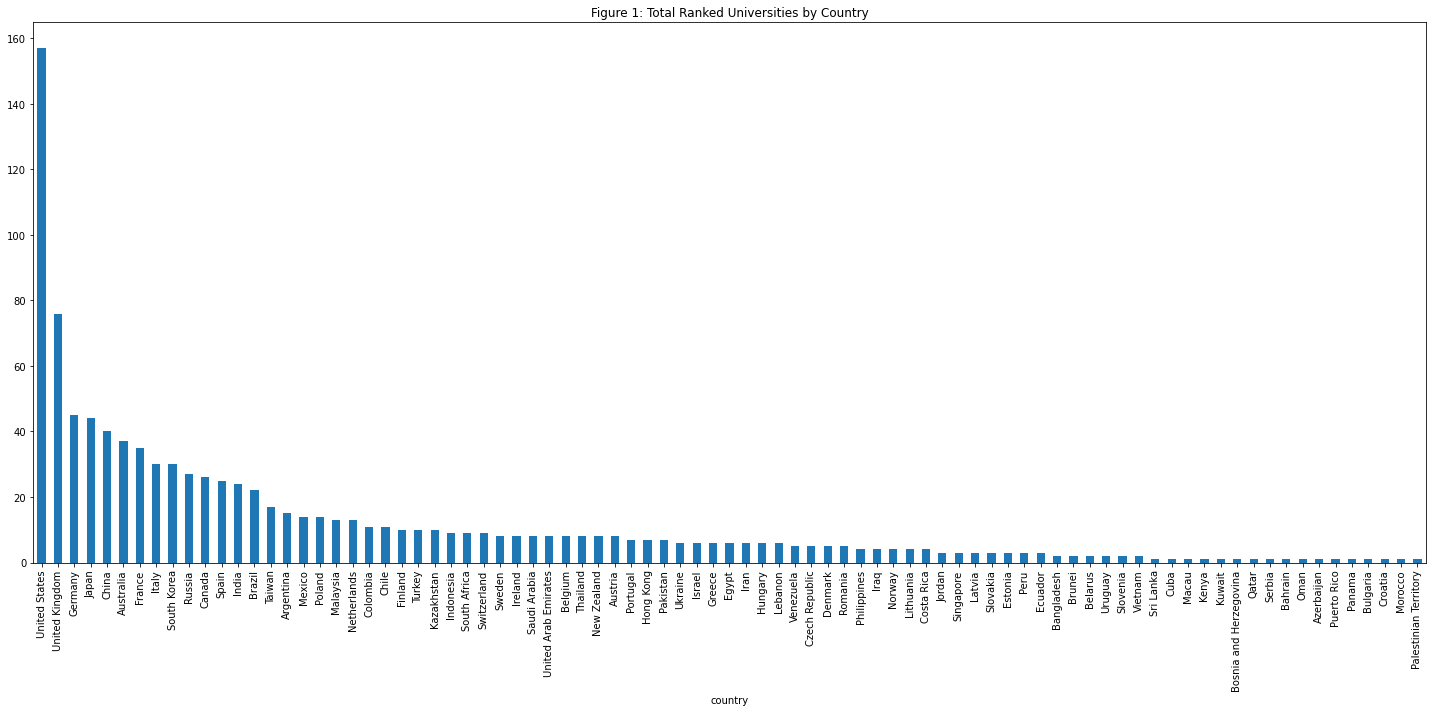

In [3]:
# Create a bar plot showing number of ranked universities per country
count_file.plot.bar(x='country', y='Number of Ranked Universities', legend=False, figsize=(20,10))
plt.title("Figure 1: Total Ranked Universities by Country")
plt.tight_layout()
plt.savefig("Results/Number of Ranked Universities per Country Visualization.png")

__Countries with the most top-1000 universities:__

1. United States: 157
2. United Kingdom: 76
3. Germany: 45

## Happiness Rank vs. Ranked University Counts

In [4]:
# Extract CSV into DataFrame
happy_universities = "results/happiness_rank_and_university_count.csv"
happy_universities = pd.read_csv(happy_universities, encoding='UTF-8')
happy_universities.head()

,Happiness Rank,Country,University Count
0,1,Finland,10
1,2,Denmark,5
2,3,Norway,4
3,5,Netherlands,13
4,6,Switzerland,9


Text(0.5, 1.0, 'Happiness Rank vs. Ranked Universities')

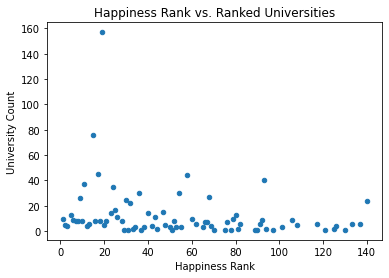

In [5]:
# Plot happiness rank and university count on a scatter plot
happy_universities.plot.scatter('Happiness Rank', 'University Count')
plt.title('Happiness Rank vs. Ranked Universities')

The correlation between both factors is -0.23


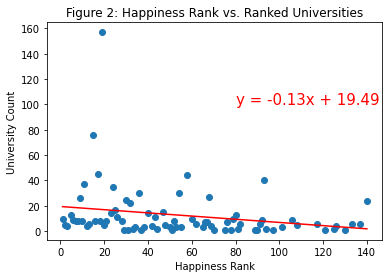

In [6]:
# Define x- and y-values
x_values = happy_universities['Happiness Rank']
y_values = happy_universities['University Count']

# Create scatter plot showing linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,100),fontsize=15,color="red")

# Create graph labels
plt.xlabel('Happiness Rank')
plt.ylabel('University Count')
plt.title('Figure 2: Happiness Rank vs. Ranked Universities')

# Determine Pearson correlation between happiness rank and university count
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Save full figure as PNG file
plt.savefig("Results/happiness_rank_vs_ranked_university_count.png")

Figure 2 shows the happiness rank of country vs. the number of universities it has ranked in the top 1000. The correlation between the two variables appears to be very weak at best; however, the correlation is generally negative. In general, it is preferable to have a lower happiness rank (thereby being a happier country) and a higher ranked university count; therefore, a negative correlation was expected.

It is worth noting that the Sustainable Development Solutions Network ranked happiness in 2019 on six categories, none of which directly referred to education. Had the happiness index included a measure on access to public education or average education level, then we would have expected a stronger correlation.

## University Rank Changes from 2018 to 2019: Best & Worst

In [7]:
# Extract CSV into DataFrame
univ_rank_changes = pd.read_csv('Results/univ_rank_changes.csv')
univ_rank_changes.head()

,year_2019,year_2018,institution_name,rank_change,country,overall_rank
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),0,United States,19
1,2,2,STANFORD UNIVERSITY,0,United States,19
2,3,3,HARVARD UNIVERSITY,0,United States,19
3,4,4,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),0,United States,19
4,5,6,UNIVERSITY OF OXFORD,1,United Kingdom,15


In [8]:
# Create dataframe to include the 15 universities that had the most positive change in rank
best_univ_change = univ_rank_changes.sort_values(by=['rank_change'], ascending=False)
best_15 = best_univ_change.nlargest(15,'rank_change')
best_15

,year_2019,year_2018,institution_name,rank_change,country,overall_rank
361,363,501,TECHNISCHE UNIVERSITÄT GRAZ,138,Austria,10
314,315,451,KHALIFA UNIVERSITY,136,United Arab Emirates,21
690,701,801,CHUNGNAM NATIONAL UNIVERSITY,100,South Korea,54
603,601,701,LOBACHEVSKY STATE UNIVERSITY OF NIZHNI NOVGOROD,100,Russia,68
702,701,801,SAMARA NATIONAL RESEARCH UNIVERSITY (SAMARA UN...,100,Russia,68
712,701,801,UNIVERSITÀ DEGLI STUDI DI SIENA (UNISI),100,Italy,36
716,701,801,UNIVERSITÄT ROSTOCK,100,Germany,17
720,701,801,UNIVERSITY OF EAST LONDON,100,United Kingdom,15
547,551,651,QUAID-I-AZAM UNIVERSITY,100,Pakistan,67
721,701,801,UNIVERSITY OF GREENWICH,100,United Kingdom,15


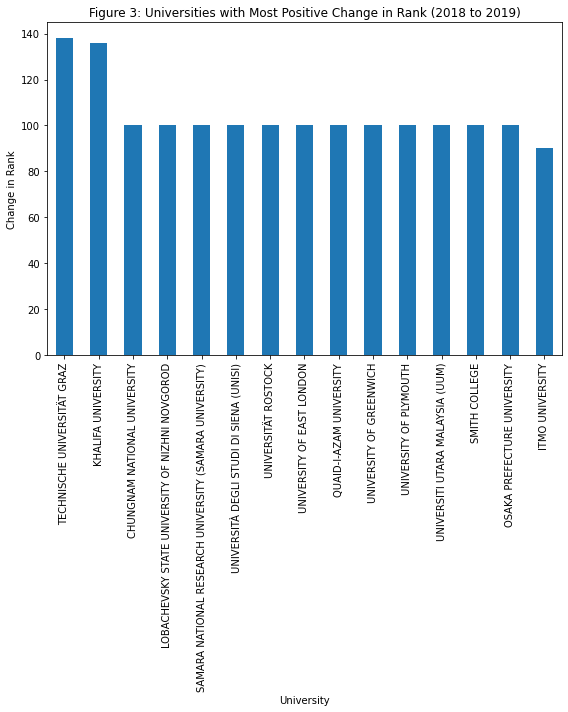

In [9]:
# Create chart to show the top 15 universities that had the greatest positive change in rank
ax = best_15.plot.bar(x='institution_name', y='rank_change', legend=False, figsize=(8, 10))
plt.title('Figure 3: Universities with Most Positive Change in Rank (2018 to 2019)')
plt.xlabel('University')
plt.ylabel('Change in Rank')
plt.tight_layout()

# Save full figure as PNG file
plt.savefig("Results/most_positive_change_in_rank.png")

In [10]:
# Create dataframe to include the 15 universities that had the most negative change in rank
worst_univ_change = univ_rank_changes.sort_values(by=['rank_change'], ascending=True)
worst_15 = worst_univ_change.nsmallest(15,'rank_change')
worst_15

,year_2019,year_2018,institution_name,rank_change,country,overall_rank
639,801,601,UNIVERSITY OF ZAGREB,-200,Croatia,75
816,801,651,KUWAIT UNIVERSITY,-150,Kuwait,51
673,651,501,UNIVERSITY OF BAGHDAD,-150,Iraq,126
850,801,651,UNIVERSIDAD CATÓLICA ANDRÉS BELLO - UCAB,-150,Venezuela,108
545,551,401,LEIBNIZ UNIVERSITÄT HANNOVER,-150,Germany,17
621,601,461,UNIVERSITÄT POTSDAM,-140,Germany,17
570,571,441,UNIVERSITÉ PARIS DESCARTES,-130,France,24
530,531,411,TARAS SHEVCHENKO NATIONAL UNIVERSITY OF KYIV,-120,Ukraine,133
546,551,431,PONTIFICIA UNIVERSIDAD CATÓLICA DEL PERÚ,-120,Peru,65
359,363,259,NORWEGIAN UNIVERSITY OF SCIENCE AND TECHNOLOGY,-104,Norway,3


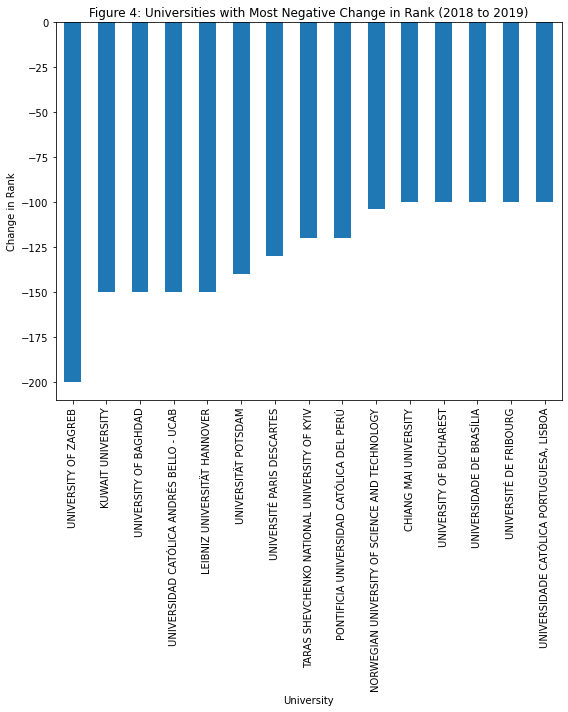

In [11]:
# Create chart to show the top 15 universities that had the greatest positive change in rank
ay = worst_15.plot.bar(x='institution_name', y='rank_change', legend=False, figsize=(8, 10))
plt.title('Figure 4: Universities with Most Negative Change in Rank (2018 to 2019)')
plt.xlabel('University')
plt.ylabel('Change in Rank')
plt.tight_layout()

# Save full figure as PNG file
plt.savefig("Results/most_negative_change_in_rank.png")